## 数据清洗

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [2]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [3]:
print('train shape :',train.shape)
print('test shape :',test.shape)
print(train.isnull().sum())
print(test.isnull().sum())
df_full=pd.concat([train,test],axis=0,ignore_index=True,sort=False)
df_full.isnull().sum()

train shape : (891, 12)
test shape : (418, 11)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [4]:
df_full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
df_full.drop(['Cabin'], axis=1, inplace=True)##只能运行一次

In [6]:
df_full.Embarked = df_full.Embarked.fillna('S')
## S 类别数量更多，所以填充时用 S 更好
### 这条语句仅是复制该列数据再填充

In [7]:
df_full.Age=df_full.Age.fillna(df_full.Age.mean())

In [8]:
df_full.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
df_full.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [10]:
df_full.Embarked=df_full.Embarked.map({'S':0,'C':1,'Q':2})

In [11]:
df_full.Embarked.value_counts()

0    916
1    270
2    123
Name: Embarked, dtype: int64

In [12]:
df_full.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [13]:
df_full.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [14]:
df_full.Sex=df_full.Sex.map({'male':1,'female':0})

In [15]:
def trans_age(x):
    if x<=12:
        return 0
    elif 12<x<=18:
        return 1
    elif 18<x<=30:
        return 2
    elif 30<x<=60:
        return 3
    else:
        return 4
df_full.Age=df_full.Age.map(lambda x: trans_age(x))##不需要加中括号使其变成dictionary

In [16]:
df_full.Age.value_counts()

2    679
3    404
1     99
0     94
4     33
Name: Age, dtype: int64

In [17]:
df_full.Fare

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
5         8.4583
6        51.8625
7        21.0750
8        11.1333
9        30.0708
10       16.7000
11       26.5500
12        8.0500
13       31.2750
14        7.8542
15       16.0000
16       29.1250
17       13.0000
18       18.0000
19        7.2250
20       26.0000
21       13.0000
22        8.0292
23       35.5000
24       21.0750
25       31.3875
26        7.2250
27      263.0000
28        7.8792
29        7.8958
          ...   
1279      7.7500
1280     21.0750
1281     93.5000
1282     39.4000
1283     20.2500
1284     10.5000
1285     22.0250
1286     60.0000
1287      7.2500
1288     79.2000
1289      7.7750
1290      7.7333
1291    164.8667
1292     21.0000
1293     59.4000
1294     47.1000
1295     27.7208
1296     13.8625
1297     10.5000
1298    211.5000
1299      7.7208
1300     13.7750
1301      7.7500
1302     90.0000
1303      7.7750
1304      8.0500
1305    108.9000
1306      7.25

In [18]:
df_full.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [19]:
def trans_fare(x):
    if x<=8.0:
        return 0
    elif 8.0<x<=15.0:
        return 1
    elif 15.0<x<=32.0:
        return 2
    else:
        return 3
df_full.Fare=df_full.Fare.map(lambda x: trans_fare(x))
df_full.Fare.value_counts()

0    360
2    324
1    313
3    312
Name: Fare, dtype: int64

In [20]:
df_full.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.644003,2.139801,0.498854,0.385027,1.449198,0.394194
std,378.020061,0.486592,0.837836,0.478997,0.867973,1.041658,0.865560,1.129217,0.653499
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,982.000000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,2.000000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,4.000000,8.000000,9.000000,3.000000,2.000000


In [21]:
x=df_full[:891][['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df_to_predict=df_full[892:][['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df_full.Survived[:891]
y.tail(5)

886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, dtype: float64

In [22]:
x.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,1,0,0,0
1,1,0,3,1,0,3,1
2,3,0,2,0,0,0,0
3,1,0,3,1,0,3,0
4,3,1,3,0,0,1,0


## 拟合模型

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
##random_state跟random.seed是一个作用

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
clf=DecisionTreeClassifier(random_state=2019)
clf.fit(x_train,y_train)
y_pre=clf.predict(x_test)
print(confusion_matrix(y_test,y_pre))
print(accuracy_score(y_test,y_pre))

[[91 15]
 [27 46]]
0.7653631284916201


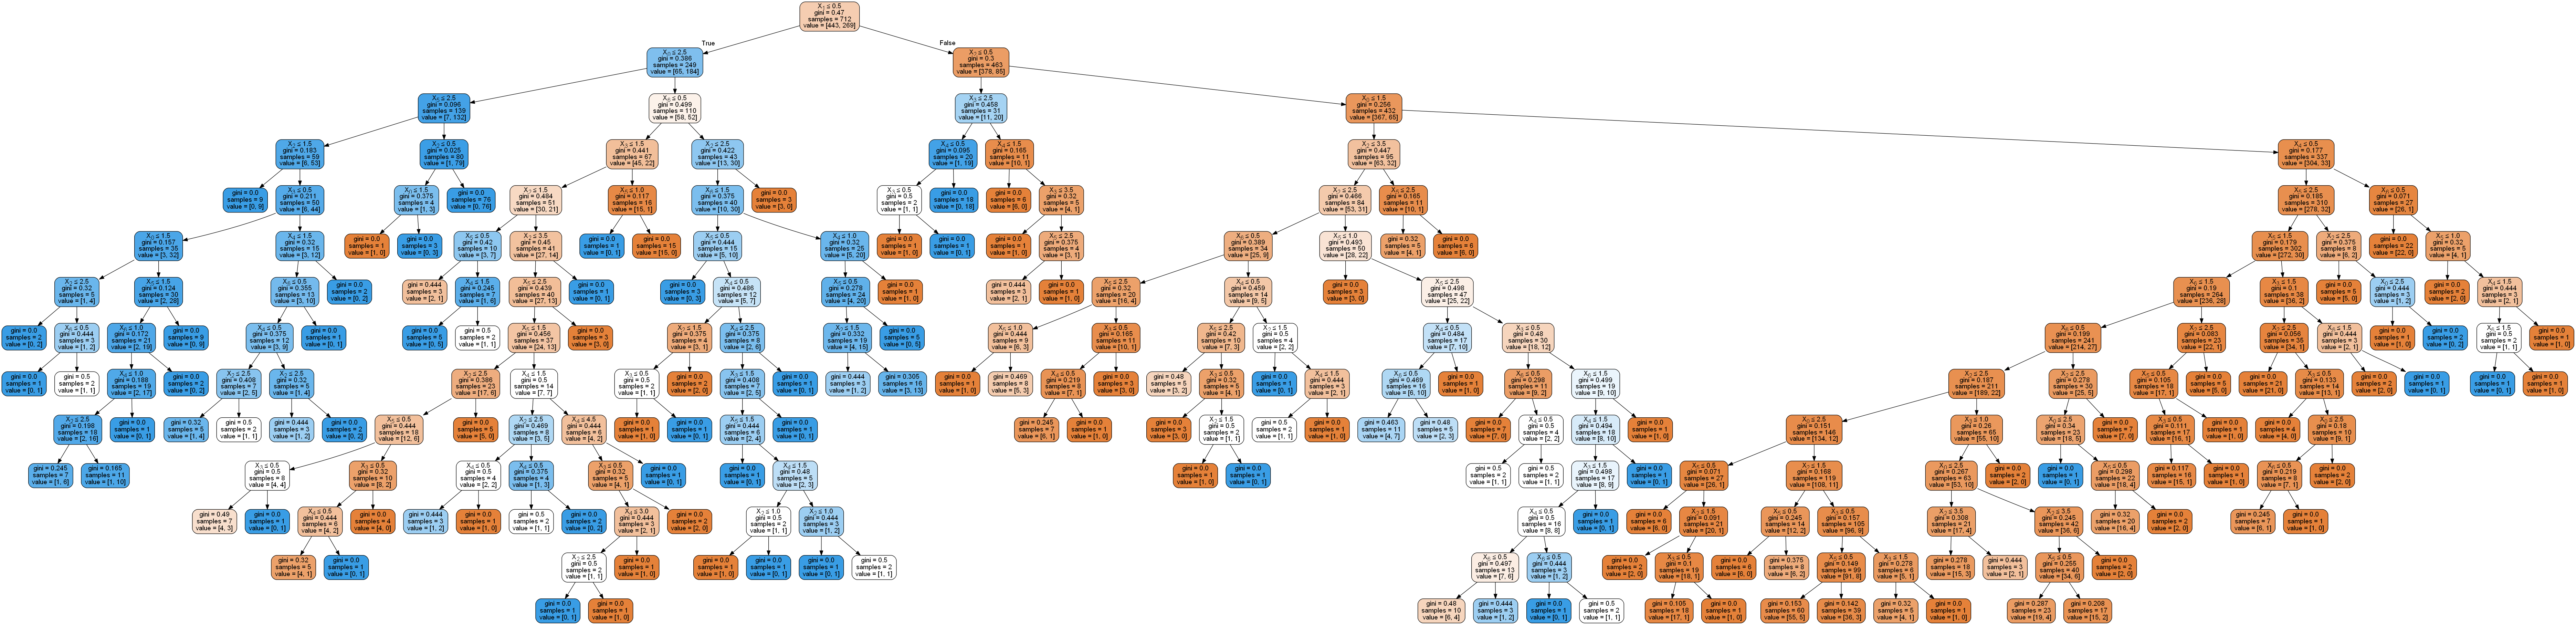

In [25]:
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('DecisionTree.pdf')
Image(graph.create_png())

##practice
from sklearn.externals.six import StingIO
from Ipython.display import Image

dot_data=StringIO
tree.export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## 模型调参

In [26]:
clf_1=DecisionTreeClassifier(max_depth=10)
clf_1.fit(x_train,y_train)
y_pre_1=clf_1.predict(x_test)
accuracy_score(y_test,y_pre_1)

0.7653631284916201

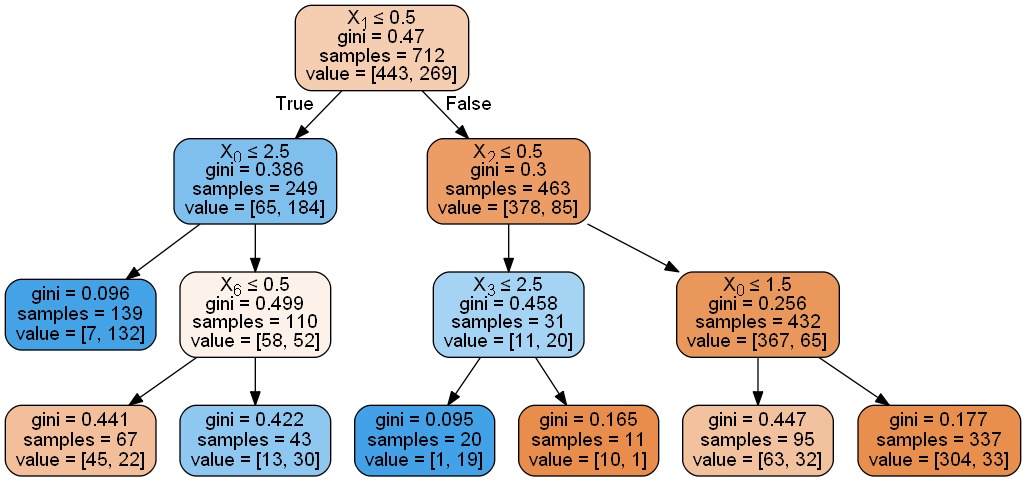

In [27]:
clf_2=DecisionTreeClassifier(max_depth=5,min_impurity_decrease=0.01)
clf_2.fit(x_train,y_train)
y_pre_2=clf_2.predict(x_test)
accuracy_score(y_test,y_pre_2)

from sklearn.externals.six import StringIO
from IPython.display import Image##     IP  都是大写 
dot_data=StringIO()
tree.export_graphviz(clf_2,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())##getvalue中间不加横杠
graph.write_pdf('DecisionTreeClassifier_2.pdf')
Image(graph.create_png())##是create_png()